In [1]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder

from numpy import array
import numpy as np

import matplotlib.pyplot as plt
import time
from statistics import mean as mean


2024-12-10 13:23:41.865154: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 13:23:41.865255: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 13:23:41.865298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 13:23:43.207015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from numpy.random import seed
seed (453)

In [3]:
iris = pd.read_csv ("http://raptor.kent.ac.uk/~ds756/Data/iris.csv")


In [4]:
data = iris.drop (columns = "Mono")

data.describe ()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pre-process our continuous features.
#
#  1. Scale
#  2. Translate

In [5]:
data.iloc[:, 0:4] /= data.iloc[:, 0:4].max ()

In [6]:
data.iloc[:, 0:4] -= data.iloc[:, 0:4].mean ()

In [7]:
data.describe ()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.144833e-17,-4.440892e-17,-7.105427e-17,0.000000
std,1.048185e-01,9.906052e-02,2.558403e-01,0.304895
min,-1.953586e-01,-2.403030e-01,-3.997101e-01,-0.439733
25%,-9.409283e-02,-5.848485e-02,-3.127536e-01,-0.359733
50%,-5.485232e-03,-1.303030e-02,8.579710e-02,0.040267
75%,7.046414e-02,5.515152e-02,1.944928e-01,0.240267
max,2.603376e-01,3.051515e-01,4.553623e-01,0.520267


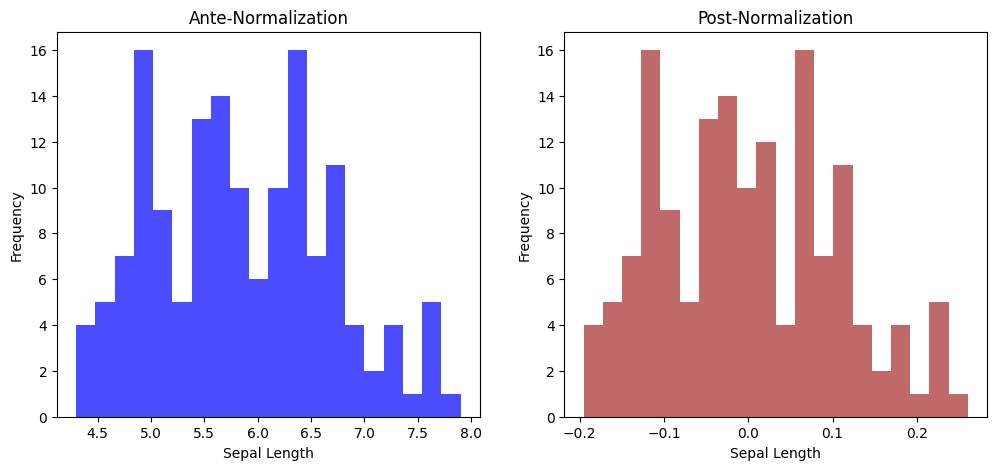

In [8]:
fig, axes = plt.subplots (1, 2, figsize=(12, 5))

axes[0].hist (iris.Sepal_Length, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Ante-Normalization')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Frequency')

axes[1].hist (data.Sepal_Length, bins=20, color='brown', alpha=0.7)
axes[1].set_title('Post-Normalization')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Frequency')

plt.show ()

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">Build a classifier for the iris dataset.</p>
<p style="font-size:20px">The first step, construct the training data.</p>

In [9]:
#
# Get the raw numpy array for the predictors
#

X = data.iloc[:, 0:4].values

X.shape

(150, 4)

<p style="font-size:20px">_____________________________________________________________________________________</p>

<p style="font-size:20px">Hot-encode our species.  This is done as follows:</p>

<ul style="font-size:20px">
    <li>Discover all of the unique labels and assign them a unique integers.</li>  
    <li>The integers corrospond to indices in the hot-encoded vector.</li>
    <li>Build a vector of integers corrosponding to their labels.</li>
    <li>Request Keras to build our ANN.</li>
    <li>Build an array of vectors where only the correct entry has a 1.</li>
</ul>

In [10]:
Species = iris.Species.unique ()
Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
iris.Species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [12]:
# creates the encoder object
enc = OneHotEncoder (sparse_output=False)

# encodes and replaces the original values on the dataframe
Y = enc.fit_transform (iris.loc[:, ['Species']])

In [13]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have prepared our data, now specify the ANN</p>

In [14]:
# Keras container for our model
model = Sequential()

# input vector of dim 4, for our 4 predictors
model.add (Dense (8, input_dim=4, activation='sigmoid'))

# Second layer, 8 neurons
model.add (Dense(8, activation='relu'))

# Softmax layer for classification
model.add (Dense (3, activation='softmax', name="Prediction"))

# Having specified the topology we now build the ANN
model.compile (loss='categorical_crossentropy', optimizer='adam')

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 Prediction (Dense)          (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have our training data, and our ANN, we can train the ANN now.</p>

In [15]:
start_time = time.time ()

h = model.fit (X, Y, verbose=False, epochs = 5000)

dt = time.time () - start_time
dt

46.809147357940674

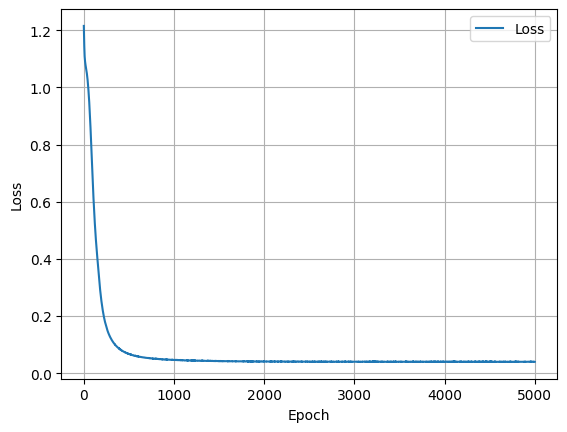

In [16]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

In [19]:
Y__ = model.predict (X)

sum (np.argmax (Y__, axis = 1) == np.argmax (Y, axis=1))



5/5 [==============================] - 0s 2ms/step


148

In [30]:
results = np.argmax (Y__, axis = 1) == np.argmax (Y, axis=1)

np.where (results == False)

(array([ 83, 133]),)

In [21]:
np.argmax (Y__[83])

2

In [22]:
np.argmax (Y__[133])

1